In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
# Đường dẫn tới cơ sở dữ liệu
DB_PATH = "../diem_thpt_quoc_gia.db"
TABLE_NAME = "Diem_THPT_QuocGia"

# Thiết lập kết nối tới cơ sở dữ liệu
conn = sqlite3.connect(DB_PATH) 

query = f"SELECT SBD, SUBJECT, SCORE FROM {TABLE_NAME}"
df = pd.read_sql_query(query, conn) 

# Đóng kết nối
conn.close()

print("5 dòng đầu tiên:\n")
df.head()

5 dòng đầu tiên:



,sbd,subject,score
0,1000001,Toán,5.75
1,1000002,Toán,8.00
2,1000003,Toán,6.75
3,1000004,Toán,5.25
4,1000006,Toán,6.50


Thông số thống kê môn Công nghệ công nghiệp


,count,mean,std,min,25%,50%,75%,max
score,2290.0,5.79,1.54,2.3,4.55,5.6,7.0,10.0


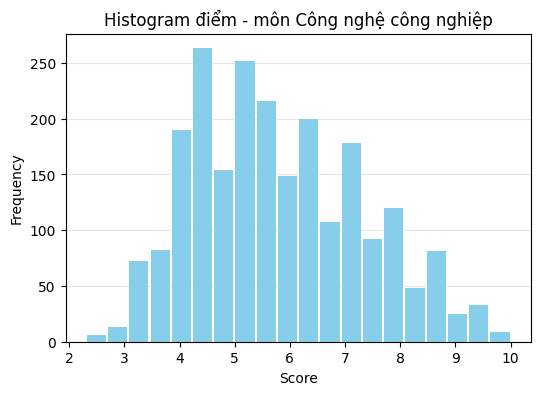

Thông số thống kê môn Công nghệ nông nghiệp


,count,mean,std,min,25%,50%,75%,max
score,22048.0,7.72,1.17,1.55,7.0,7.75,8.5,10.0


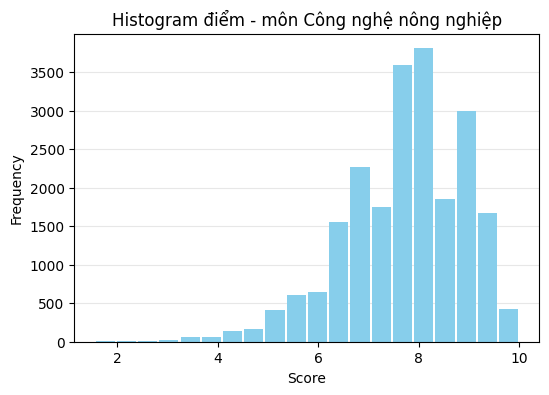

Thông số thống kê môn Giáo dục công dân


,count,mean,std,min,25%,50%,75%,max
score,4099.0,7.7,1.53,0.0,7.0,8.0,8.75,10.0


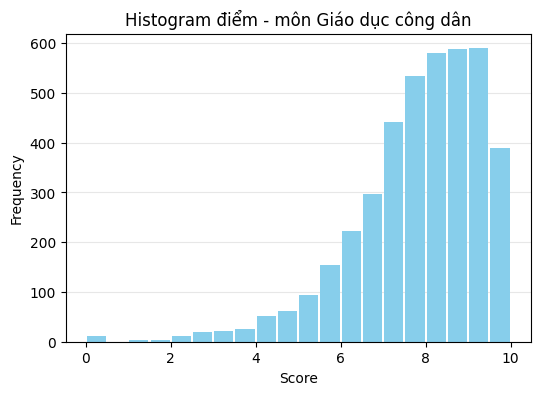

Thông số thống kê môn Giáo dục kinh tế và pháp luật


,count,mean,std,min,25%,50%,75%,max
score,246401.0,7.69,1.18,1.25,7.0,7.75,8.5,10.0


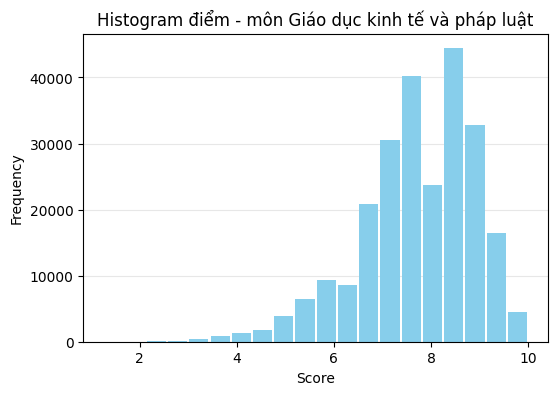

Thông số thống kê môn Hóa


,count,mean,std,min,25%,50%,75%,max
score,244283.0,6.07,1.81,0.0,4.75,6.0,7.5,10.0


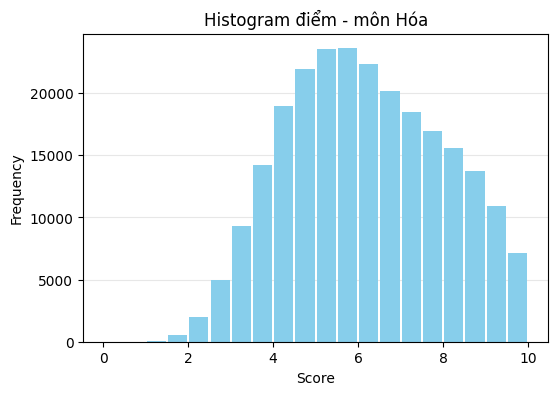

Thông số thống kê môn Lí


,count,mean,std,min,25%,50%,75%,max
score,351733.0,6.98,1.52,0.0,5.85,7.0,8.25,10.0


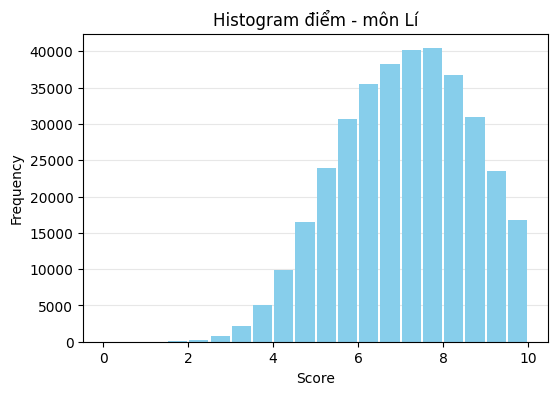

Thông số thống kê môn Ngoại ngữ


,count,mean,std,min,25%,50%,75%,max
score,362975.0,5.41,1.49,0.0,4.25,5.25,6.25,10.0


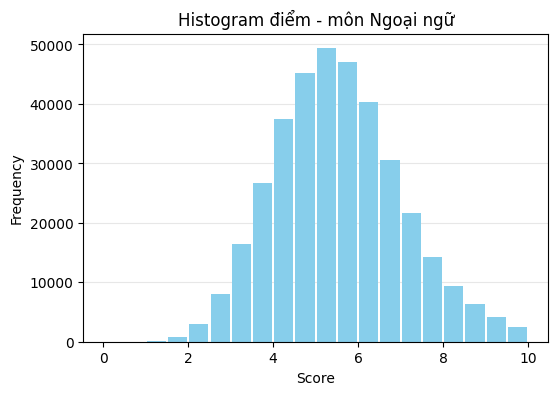

Thông số thống kê môn Sinh


,count,mean,std,min,25%,50%,75%,max
score,71616.0,5.78,1.59,0.0,4.6,5.75,7.0,10.0


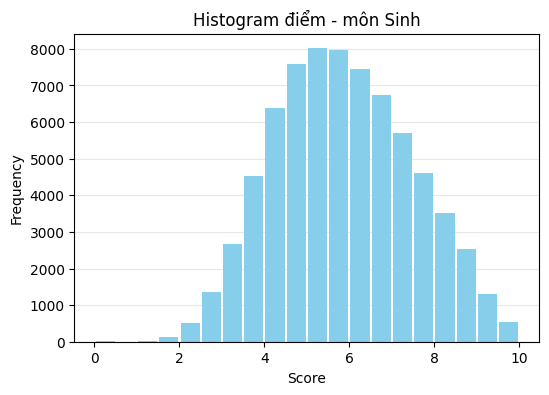

Thông số thống kê môn Sử


,count,mean,std,min,25%,50%,75%,max
score,495165.0,6.51,1.64,0.0,5.25,6.5,7.75,10.0


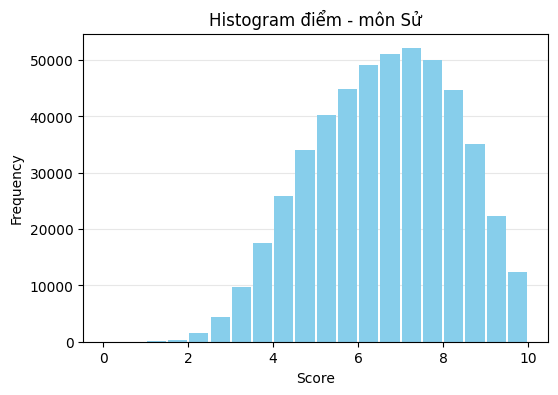

Thông số thống kê môn Tin học


,count,mean,std,min,25%,50%,75%,max
score,7602.0,6.78,1.48,1.35,5.75,6.75,7.85,10.0


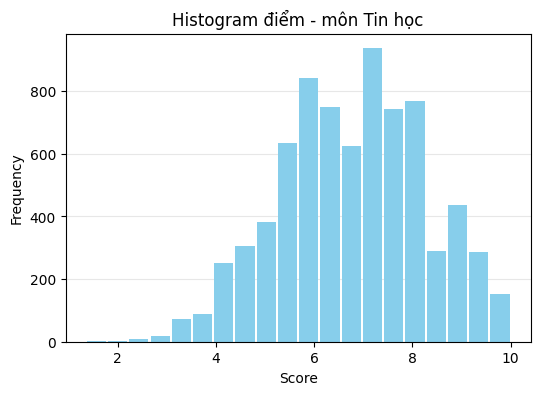

Thông số thống kê môn Toán


,count,mean,std,min,25%,50%,75%,max
score,1137417.0,4.8,1.69,0.0,3.55,4.6,5.85,10.0


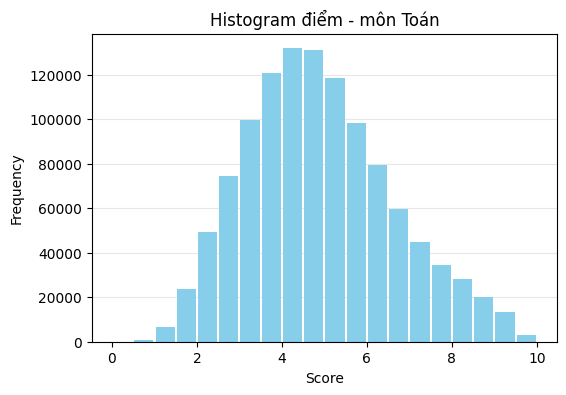

Thông số thống kê môn Văn


,count,mean,std,min,25%,50%,75%,max
score,1144098.0,6.99,1.29,0.0,6.25,7.25,8.0,9.75


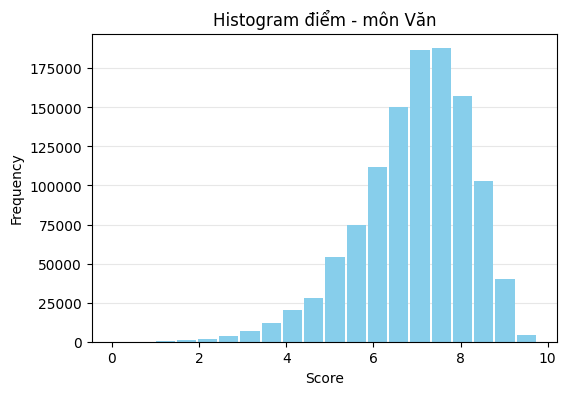

Thông số thống kê môn Địa


,count,mean,std,min,25%,50%,75%,max
score,489581.0,6.64,1.75,0.0,5.35,6.75,8.0,10.0


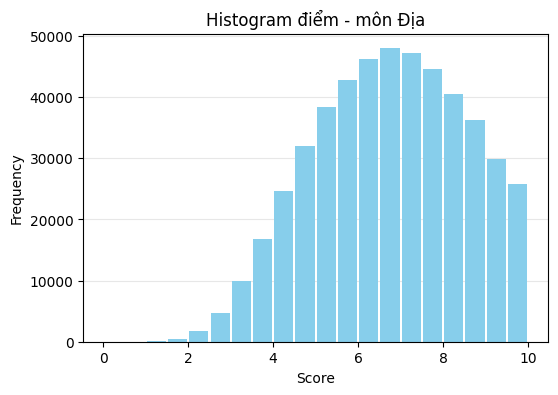

In [3]:
groups = df.groupby('subject')

for subject, group in groups:
    print("=" * 100)
    print(f"Thông số thống kê môn {subject}")
    display(group.describe().round(2).T)

    # Vẽ histogram
    plt.figure(figsize=(6, 4))
    plt.hist(group['score'], bins=20, color='skyblue', rwidth=0.9, zorder=2)
    plt.title(f'Histogram điểm - môn {subject}')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.3)
    plt.show()

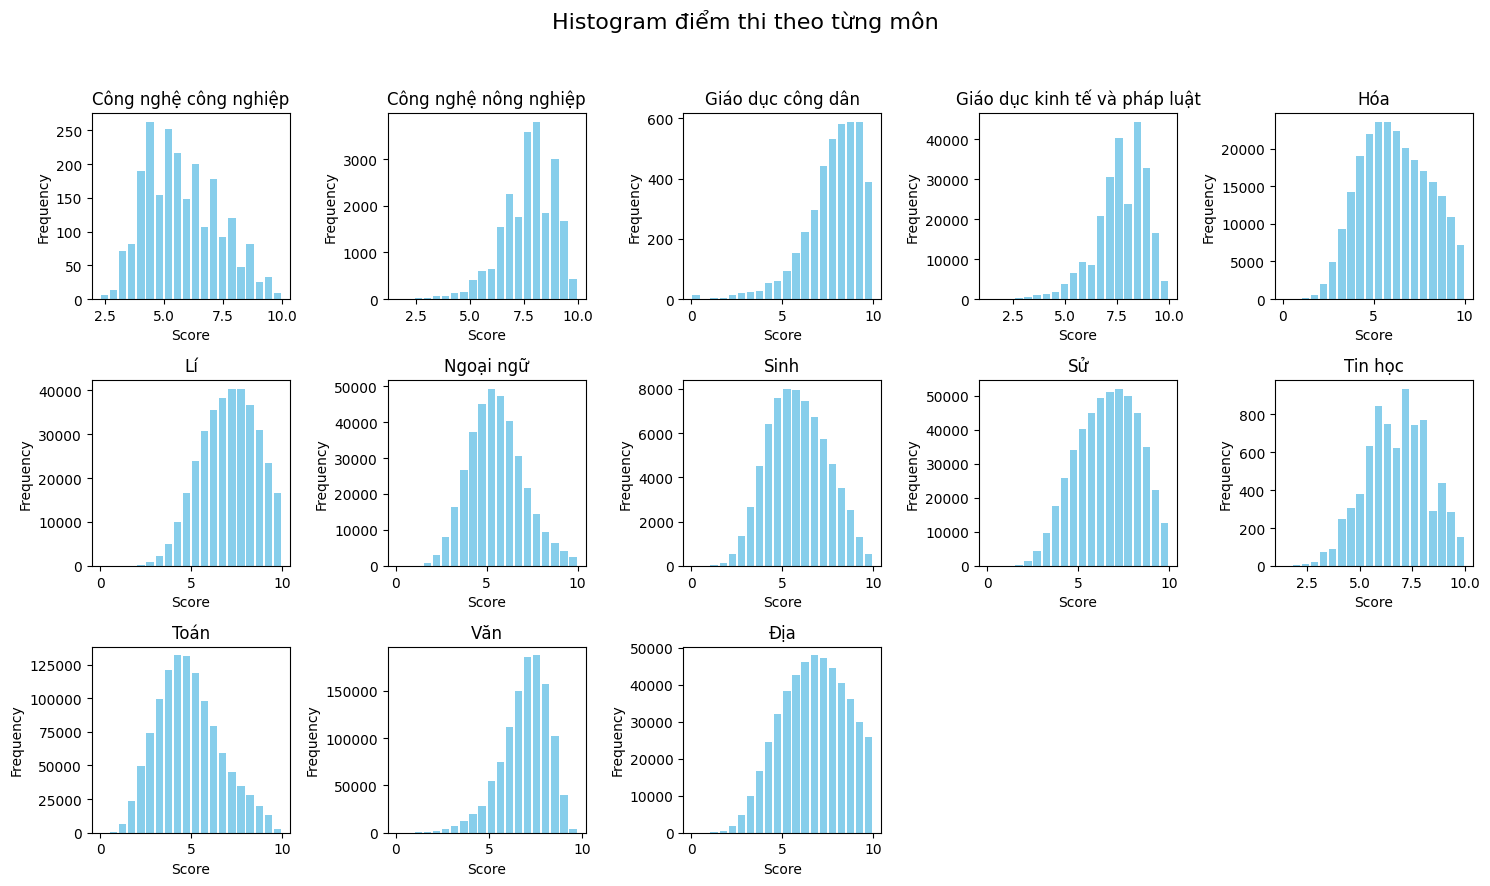

In [4]:
ncol = 5
nrow = 3
fig, axes = plt.subplots(nrow, ncol, figsize=(15, 9))
axes = axes.flatten()

for ax, (subject, group) in zip(axes, groups):
    ax.hist(group['score'], bins=20, color='skyblue', rwidth=0.8, zorder=2)
    ax.set_title(subject)
    ax.set_xlabel('Score')
    ax.set_ylabel('Frequency')

# Xóa subplot thừa
for ax in axes[len(groups):]:
    ax.axis('off')

plt.suptitle("Histogram điểm thi theo từng môn", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

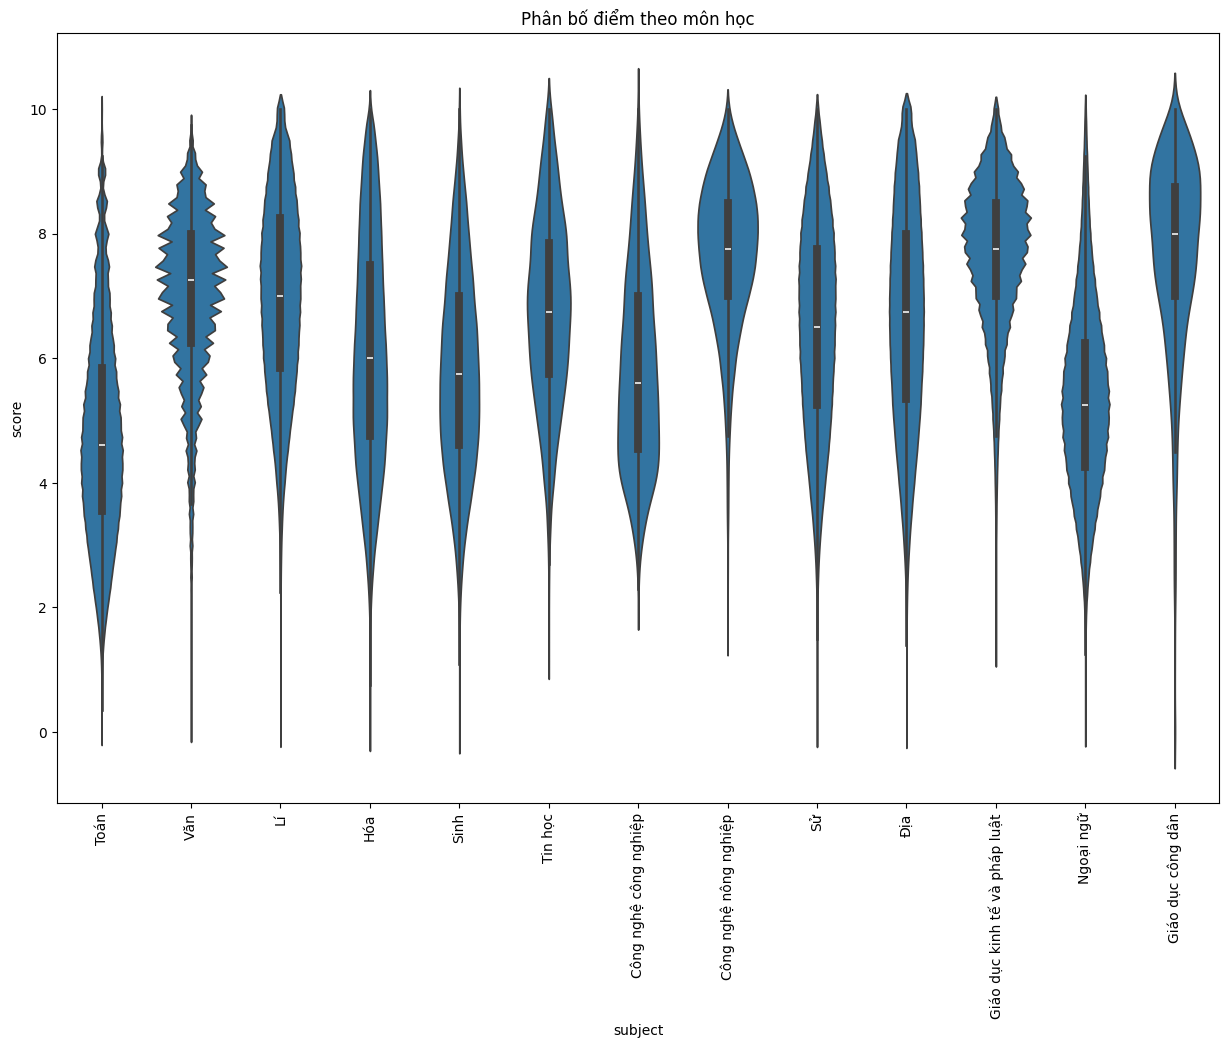

In [5]:
plt.figure(figsize=(15, 10))
sns.violinplot(data=df, x='subject', y='score')
plt.title("Phân bố điểm theo môn học")
plt.xticks(rotation=90)
plt.show()